In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option("display.max_rows",1000)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
url="https://www.hepsiemlak.com/denizli-kiralik"
response=requests.get(url)

In [3]:
response

<Response [200]>

In [4]:
soup=BeautifulSoup(response.text,"html.parser")

In [5]:
pages=soup.findAll("li",{"class":"he-pagination__item"})
last_page=0
for i in pages:
    last_page=i.text
last_page=int(last_page)

In [6]:
last_page

14

In [7]:
prices=[]
room_counts=[]
meter_squares=[]
build_ages=[]
floor_types=[]
towns=[]
neighbourhoods=[]
listing_dates=[]
estate_agents=[]
advert_noes=[]

for i in range(1,last_page+1):
    
    url="https://www.hepsiemlak.com/denizli-kiralik?page="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")     
    priceOnce=soup.findAll("div",{"class":"top"})   
    price=soup.findAll("span",{"class":"list-view-price"})     
    room_count=soup.findAll("span",{"class":"celly houseRoomCount"})     
    meter_square=soup.findAll("span",{"class":"celly squareMeter list-view-size"})   
    build_age=soup.findAll("span",{"class":"celly buildingAge"})    
    floor_type=soup.findAll("span",{"class":"celly floortype"})
    location=soup.findAll("div",{"class":"list-view-location"})
    listing_date=soup.findAll("span",{"class":"list-view-date"})
    estate_agent=soup.findAll("span",{"class":"phone-consultant-name"})
    advert_no=soup.findAll("span",{"class":"phone-listing-id"})
    
     
    for a,b,c,d,e,f,g,h,j,k in zip(price,room_count,meter_square,build_age,floor_type,location,location,listing_date,estate_agent,advert_no):
                                 
        prices.append(a.text.replace("\n","").replace(".","").replace("TL",""))  
       
        room_counts.append(b.text)        
        meter_squares.append(c.text.replace("\n","").replace(" ","").replace("m2",""))
        build_ages.append(d.text)
        floor_types.append(e.text.replace("\n","").replace(" ",""))
        towns.append(f.text.replace("\n","").replace(" ","").split(",")[0])
        neighbourhoods.append(f.text.replace("\n","").replace(" ","").split(",")[1])
        listing_dates.append(h.text)
        estate_agents.append(j.text.replace("\n","").replace(" ",""))
        advert_noes.append(k.text.replace("\n","").replace(" ","").replace("İlanNo:",""))

In [8]:
datas={"İlan NO":advert_noes,"Fiyat":prices,"Oda Sayısı":room_counts,"Metre Kare":meter_squares,"Bina Yaşı":build_ages,"Kat No":floor_types,"İlçe":towns,"Mahalle":neighbourhoods,"İlan Tarihi":listing_dates,"Emlakçı":estate_agents}

In [9]:
df=pd.DataFrame(datas)
df

,İlan NO,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,128169-163,5000,4 + 1,200,15 Yaşında,5.Kat,Merkezefendi,SelçukBeyMahallesi,\n 02 Aralık 2022\n,AkifErsoy
1,94398-4959,3000,2 + 1,125,21 Yaşında,3.Kat,Merkezefendi,YenişehirMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
2,123902-432,4000,2 + 1,120,Sıfır Bina,YüksekGiriş,Merkezefendi,1200EvlerMahallesi,\n 02 Aralık 2022\n,ÖZENÖZÇELİK
3,128169-165,3750,3 + 1,175,16 Yaşında,3.Kat,Merkezefendi,YenişafakMahallesi,\n 02 Aralık 2022\n,AkifErsoy
4,66036-55,5250,2 + 1,100,26 Yaşında,4.Kat,Pamukkale,KınıklıMahallesi,\n 02 Aralık 2022\n,MustafaKocabay
5,60626-891,1750,2 + 1,120,32 Yaşında,2.Kat,Merkezefendi,MuratdedeMahallesi,\n 02 Aralık 2022\n,HALİLKOÇOĞLU
6,94398-4939,2800,2 + 1,95,21 Yaşında,YüksekGiriş,Merkezefendi,AdaletMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
7,131323-68,3000,2 + 1,80,Sıfır Bina,2.Kat,Merkezefendi,MehmetAkifErsoyMahallesi,\n 29 Kasım 2022\n,FatmaUlaman
8,128687-252,9950,4 + 1,205,Sıfır Bina,2.Kat,Merkezefendi,ŞemiklerMahallesi,\n 30 Kasım 2022\n,MustafaESKİ
9,77841-31,4250,3 + 1,120,7 Yaşında,YüksekGiriş,Merkezefendi,ServergaziMahallesi,\n 30 Kasım 2022\n,EKREMÇELİK


In [10]:
df.to_csv("denizli_hepsi_emlak.csv")

In [11]:
df2=pd.read_csv("denizli_hepsi_emlak.csv")

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   336 non-null    int64 
 1   İlan NO      336 non-null    object
 2   Fiyat        336 non-null    int64 
 3   Oda Sayısı   336 non-null    object
 4   Metre Kare   336 non-null    int64 
 5   Bina Yaşı    336 non-null    object
 6   Kat No       331 non-null    object
 7   İlçe         336 non-null    object
 8   Mahalle      336 non-null    object
 9   İlan Tarihi  336 non-null    object
 10  Emlakçı      336 non-null    object
dtypes: int64(3), object(8)
memory usage: 29.0+ KB


In [13]:
df2.isnull().sum()

Unnamed: 0     0
İlan NO        0
Fiyat          0
Oda Sayısı     0
Metre Kare     0
Bina Yaşı      0
Kat No         5
İlçe           0
Mahalle        0
İlan Tarihi    0
Emlakçı        0
dtype: int64

In [14]:
df2.head()

,Unnamed: 0,İlan NO,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,0,128169-163,5000,4 + 1,200,15 Yaşında,5.Kat,Merkezefendi,SelçukBeyMahallesi,\n 02 Aralık 2022\n,AkifErsoy
1,1,94398-4959,3000,2 + 1,125,21 Yaşında,3.Kat,Merkezefendi,YenişehirMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
2,2,123902-432,4000,2 + 1,120,Sıfır Bina,YüksekGiriş,Merkezefendi,1200EvlerMahallesi,\n 02 Aralık 2022\n,ÖZENÖZÇELİK
3,3,128169-165,3750,3 + 1,175,16 Yaşında,3.Kat,Merkezefendi,YenişafakMahallesi,\n 02 Aralık 2022\n,AkifErsoy
4,4,66036-55,5250,2 + 1,100,26 Yaşında,4.Kat,Pamukkale,KınıklıMahallesi,\n 02 Aralık 2022\n,MustafaKocabay


In [15]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [16]:
df2

,İlan NO,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,128169-163,5000,4 + 1,200,15 Yaşında,5.Kat,Merkezefendi,SelçukBeyMahallesi,\n 02 Aralık 2022\n,AkifErsoy
1,94398-4959,3000,2 + 1,125,21 Yaşında,3.Kat,Merkezefendi,YenişehirMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
2,123902-432,4000,2 + 1,120,Sıfır Bina,YüksekGiriş,Merkezefendi,1200EvlerMahallesi,\n 02 Aralık 2022\n,ÖZENÖZÇELİK
3,128169-165,3750,3 + 1,175,16 Yaşında,3.Kat,Merkezefendi,YenişafakMahallesi,\n 02 Aralık 2022\n,AkifErsoy
4,66036-55,5250,2 + 1,100,26 Yaşında,4.Kat,Pamukkale,KınıklıMahallesi,\n 02 Aralık 2022\n,MustafaKocabay
5,60626-891,1750,2 + 1,120,32 Yaşında,2.Kat,Merkezefendi,MuratdedeMahallesi,\n 02 Aralık 2022\n,HALİLKOÇOĞLU
6,94398-4939,2800,2 + 1,95,21 Yaşında,YüksekGiriş,Merkezefendi,AdaletMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
7,131323-68,3000,2 + 1,80,Sıfır Bina,2.Kat,Merkezefendi,MehmetAkifErsoyMahallesi,\n 29 Kasım 2022\n,FatmaUlaman
8,128687-252,9950,4 + 1,205,Sıfır Bina,2.Kat,Merkezefendi,ŞemiklerMahallesi,\n 30 Kasım 2022\n,MustafaESKİ
9,77841-31,4250,3 + 1,120,7 Yaşında,YüksekGiriş,Merkezefendi,ServergaziMahallesi,\n 30 Kasım 2022\n,EKREMÇELİK


In [17]:
df2["Fiyat"]=df2["Fiyat"].astype(int)
df2["Fiyat"]

0       5000
1       3000
2       4000
3       3750
4       5250
5       1750
6       2800
7       3000
8       9950
9       4250
10      6000
11      4000
12      7000
13      6000
14      3000
15      6000
16      6500
17       600
18      3000
19      3000
20      2750
21      6500
22      5000
23      6500
24      3750
25      4250
26      2750
27      2300
28      2500
29      4500
30      3000
31      5000
32      4500
33      5000
34      3500
35      3500
36      3600
37      4500
38      6000
39      3500
40      2800
41      3800
42      7000
43      3200
44      3500
45      3000
46      4000
47      2750
48      2650
49      1250
50      4000
51      3000
52      3000
53      3250
54      5000
55      4850
56      2750
57      6000
58      3650
59      2500
60      3750
61      2750
62      5000
63      2000
64      5000
65      6000
66      7000
67      2750
68      2250
69      4500
70      2000
71      2750
72      3500
73      3000
74      1500
75      8750
76      3000

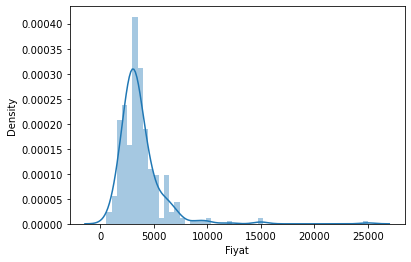

In [18]:
df2=df2[df2["Fiyat"]<3000000]
sns.distplot(df2.Fiyat);

In [19]:
df2["Oda Sayısı"]=df2["Oda Sayısı"].astype("string")

In [20]:
df2["Oda Sayısı"]=df2["Oda Sayısı"].str.replace("\n","").replace("Stüdyo","").replace("","0").str.split("+").str[0].astype("int")+1
df2=df2[df2["Oda Sayısı"]<10]

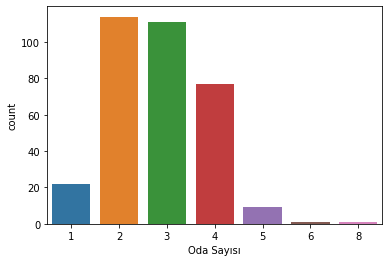

In [21]:
sns.countplot(df2["Oda Sayısı"]);

In [22]:
df2["Metre Kare"]=df2["Metre Kare"].astype("string")

In [23]:
df2["Metre Kare"]=df2["Metre Kare"].str.split("-").str[0].str.replace(".","").astype("int")

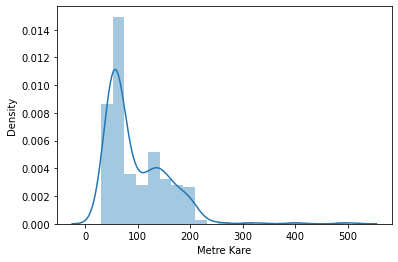

In [24]:
df2=df2[df2["Metre Kare"]<600]
sns.distplot(df2["Metre Kare"]);

In [25]:
df2["Bina Yaşı"]=df2["Bina Yaşı"].astype("string")

In [26]:
df2["Bina Yaşı"]=df2["Bina Yaşı"].str.replace("Yaşında","").replace("Sıfır Bina","0").replace(" ","").astype("int")

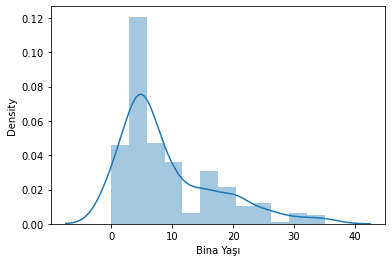

In [27]:
df2=df2[df2["Bina Yaşı"]<60]
sns.distplot(df2["Bina Yaşı"]);

In [28]:
df2["Kat No"]=df2["Kat No"].astype("string")

In [29]:
df2["Kat No"]=df2["Kat No"].replace(["Yüksek0","Giriş","Giriş Katı","Villa","-1veZemin","Bahçe","Bahçe Katı","None","Zemin","Bodrum ve Zemin","Yarı Bodrum","Villa Katı","Yüksek Giriş","YüksekGiriş","Yarı-1"],"0",regex=True)
df2["Kat No"]=df2["Kat No"].str.replace("Katı","")
df2["Kat No"]=df2["Kat No"].str.replace(". Kat","")
df2["Kat No"]=df2["Kat No"].str.replace(".Kat","")
df2["Kat No"]=df2["Kat No"].str.replace("Kot 3","-3")
df2["Kat No"]=df2["Kat No"].str.replace("Kot 2","-2")
df2["Kat No"]=df2["Kat No"].replace(["Kot 1","-1ve0"],"-1")
df2["Kat No"]=df2["Kat No"].str.replace("Kot3","-3")
df2["Kat No"]=df2["Kat No"].str.replace("Kot2","-2")
df2["Kat No"]=df2["Kat No"].str.replace("Kot1","-1")
df2["Kat No"]=df2["Kat No"].str.replace("En Üs","21")
df2["Kat No"]=df2["Kat No"].str.replace("Teras","21")
df2["Kat No"]=df2["Kat No"].str.replace("Çatı","21")
df2["Kat No"]=df2["Kat No"].replace(["21 ve üzeri","21veüzeri","EnÜs"],"21")
df2["Kat No"]=df2["Kat No"].str.replace("Ar","2")
df2["Kat No"]=df2["Kat No"].str.replace("Bodrum","-1")
df2["Kat No"]=df2["Kat No"].str.replace("Yüksek0","")
df2["Kat No"]=df2["Kat No"].fillna("0")

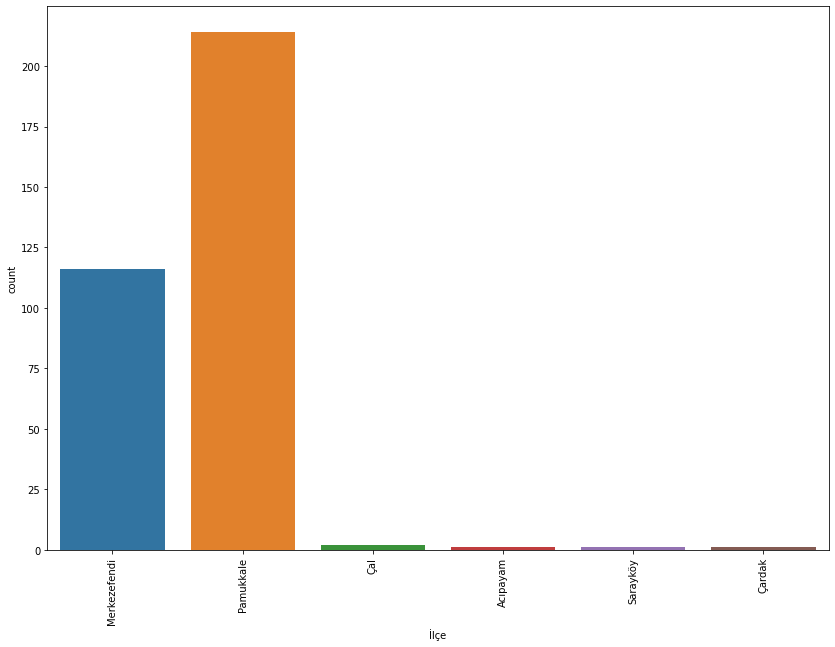

In [30]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.countplot(df2["İlçe"]);

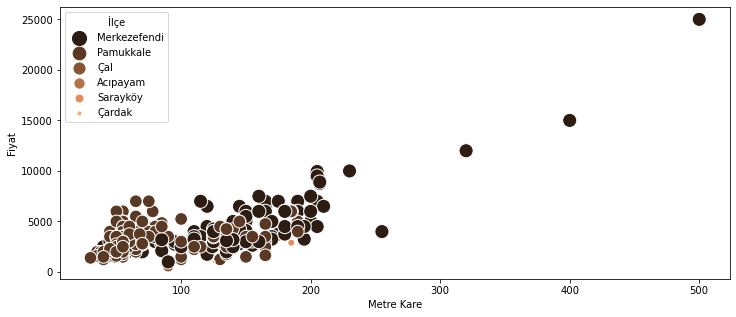

In [31]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="Metre Kare", y="Fiyat",
                     hue="İlçe", size ="İlçe",
                     palette='copper', sizes=(10, 200),
                     data=df2)
plt.xlabel("Metre Kare")
plt.ylabel("Fiyat")
plt.show()

In [32]:
df2["Emlakçı"].value_counts()

AYGÜLMUTLUBAŞ           45
SerhatÇam               22
NEDİMKISAOĞLU           15
FatihDemirhan           14
SedatYÜRECİ             11
TOLGASAĞIR              10
tarıkkahraman            8
OFİSMUTLUBAŞ             8
ElifzehraŞişman          7
KOZAGAYRİMENKULB         7
HakanManas               7
MustafaUmuç              7
İNCİGAYRİMENKUL          7
celalözcan               6
ErdemÇakır               6
GÖKANDİNCER              5
ALİMANAYCI               5
mervekoyunyerli          5
MuhammetAşkar            5
ÖZENÖZÇELİK              4
MuratŞen                 4
MeltemACAR               3
HALİLKOÇOĞLU             3
sevilaykul               3
FatmaUlaman              3
ŞahinAyhan               3
ÖZLERTOKUR               3
ÖZNURDORUM               3
HASANSEFAURKAY           3
hamzaçelik               2
SÜLEYMANKAPLAN           2
MUSTAFAÖZTOK             2
ÖzlemHanım               2
ErkanBeydemir            2
ESRASERİN                2
berrinakça               2
REGAİBÇAĞLAYAN           2
V

In [33]:
df2.corr()

,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı
Fiyat,1.000000,0.617078,0.696224,-0.085422
Oda Sayısı,0.617078,1.000000,0.858207,0.314632
Metre Kare,0.696224,0.858207,1.000000,0.331972
Bina Yaşı,-0.085422,0.314632,0.331972,1.000000


In [34]:
df2

,İlan NO,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,128169-163,5000,5,200,15,5,Merkezefendi,SelçukBeyMahallesi,\n 02 Aralık 2022\n,AkifErsoy
1,94398-4959,3000,3,125,21,3,Merkezefendi,YenişehirMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
2,123902-432,4000,3,120,0,,Merkezefendi,1200EvlerMahallesi,\n 02 Aralık 2022\n,ÖZENÖZÇELİK
3,128169-165,3750,4,175,16,3,Merkezefendi,YenişafakMahallesi,\n 02 Aralık 2022\n,AkifErsoy
4,66036-55,5250,3,100,26,4,Pamukkale,KınıklıMahallesi,\n 02 Aralık 2022\n,MustafaKocabay
5,60626-891,1750,3,120,32,2,Merkezefendi,MuratdedeMahallesi,\n 02 Aralık 2022\n,HALİLKOÇOĞLU
6,94398-4939,2800,3,95,21,,Merkezefendi,AdaletMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
7,131323-68,3000,3,80,0,2,Merkezefendi,MehmetAkifErsoyMahallesi,\n 29 Kasım 2022\n,FatmaUlaman
8,128687-252,9950,5,205,0,2,Merkezefendi,ŞemiklerMahallesi,\n 30 Kasım 2022\n,MustafaESKİ
9,77841-31,4250,4,120,7,,Merkezefendi,ServergaziMahallesi,\n 30 Kasım 2022\n,EKREMÇELİK


In [35]:
df2["Fiyat"]=df2["Fiyat"].astype(int)
df2["Oda Sayısı"]=df2["Oda Sayısı"].astype(int)
df2["Metre Kare"]=df2["Metre Kare"].astype(int)
df2["Bina Yaşı"]=df2["Bina Yaşı"].astype(int)

In [36]:
del df2["Kat No"]
del df2["İlçe"]
del df2["Mahalle"] 
del df2["İlan Tarihi"]
del df2["Emlakçı"]

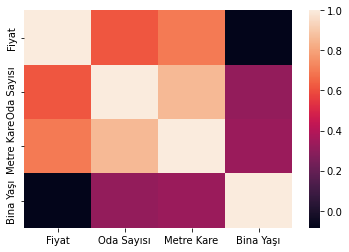

In [37]:
sns.heatmap(df2.corr());

In [38]:
x,y=df2.drop("Fiyat",axis=1),df2[["Fiyat"]]

In [39]:
def regression(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    #Lineer Olanlar
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Lasso,Ridge
    from sklearn.linear_model import ElasticNet
    
    #Lineer olmayanlar
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    x=pd.get_dummies(x,drop_first=True)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    Li=LinearRegression()
    La=Lasso()
    Ri=Ridge()
    EL=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    
    model_array=[Li,La,Ri,EL,ETR,GBR,KNR]
    model_names=["LinearRegression","Lasso","Ridge","ElasticNet","ExtraTreeRegressor","GradientBoostingRegressor","KNeighborsRegressor"]
    
    
    mean_squared_array=[]
    r2_score_array=[]
    mean_absolute_array=[]
    
    result=pd.DataFrame(columns=["mean_squared_error","r2_score","mean_absolute_error"],index=model_names)
    
    for i in model_array:
        i.fit(x_train,y_train)
        pred_i=i.predict(x_test)
        mean_squared_array.append((mean_squared_error(y_test,pred_i)**0.5))
        r2_score_array.append(r2_score(y_test,pred_i))
        mean_absolute_array.append(mean_absolute_error(y_test,pred_i))
        
    result.mean_squared_error=mean_squared_array
    result.r2_score=r2_score_array
    result.mean_absolute_error=mean_absolute_array
    
    return result.sort_values("r2_score",ascending=False)

In [40]:
regression(x,y)

,mean_squared_error,r2_score,mean_absolute_error
KNeighborsRegressor,1259.061738,0.504695,934.770149
GradientBoostingRegressor,1269.012561,0.496835,911.508418
ExtraTreeRegressor,1284.656903,0.484352,928.432836
Lasso,1296.016605,0.475193,950.259650
Ridge,1417.223775,0.372440,1044.998904
ElasticNet,1419.052830,0.370819,1048.754438
LinearRegression,2261.237652,-0.597611,1800.849028
